In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import defaultdict, deque
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df1 = pd.read_csv("../01_data/02_processed/production/X_train_nonlinear.csv")
df2 = pd.read_csv("../01_data/02_processed/production/X_test_nonlinear.csv")
df3 = pd.read_csv("../01_data/02_processed/production/y_train.csv")
df4 = pd.read_csv("../01_data/02_processed/production/y_test.csv")

In [3]:
df5 = pd.concat([df1, df2], axis=0, ignore_index=True)
df5.head(50000)

,Agent_Age,Agent_Rating,Distance,Pickup_Wait_Time,Vehicle_scooter,Vehicle_van,Area_Metropolitian,Area_Other,Area_Semi_Urban,Category_Apparel,...,Category_Kitchen,Category_Outdoors,Category_Pet Supplies,Category_Shoes,Category_Skincare,Category_Snacks,Category_Sports,Category_Toys,Traffic_score,Weather_score
0,39,5.0,3.064486,5.0,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,1,1
1,38,4.1,4.538408,10.0,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,2,5
2,26,4.9,17.297866,10.0,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,1,1
3,20,4.8,13.611172,5.0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,1,5
4,29,4.7,10.707345,5.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43438,29,4.7,6.242483,5.0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,2,5
43439,23,4.9,14.045606,10.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,4,1
43440,34,4.5,19.975287,15.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,4,2
43441,28,4.9,3.020360,5.0,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,3,3


In [5]:
df6 = pd.concat([df3, df4], axis=0, ignore_index=True )
df6.head(50000)

,Delivery_Time
0,70
1,160
2,135
3,80
4,100
...,...
43438,130
43439,145
43440,220
43441,130


In [6]:
category_cols = [c for c in df5.columns if c.startswith("Category_")]

df_no_category = df5.drop(columns=category_cols)

df_no_category.shape

(43443, 11)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_category)

X_scaled[:5]

array([[ 1.63914391e+00,  1.16199909e+00, -1.18980563e+00,
        -1.22150212e+00,  1.40953879e+00, -2.96198910e-01,
         5.80867678e-01, -1.63567332e-01, -5.92547247e-02,
        -1.11088291e+00, -1.47989009e+00],
       [ 1.46558454e+00, -1.70560849e+00, -9.26825034e-01,
         1.99959999e-03,  1.40953879e+00, -2.96198910e-01,
         5.80867678e-01, -1.63567332e-01, -5.92547247e-02,
        -3.08287097e-01,  8.73276526e-01],
       [-6.17127968e-01,  8.43376030e-01,  1.34974691e+00,
         1.99959999e-03,  1.40953879e+00, -2.96198910e-01,
         5.80867678e-01, -1.63567332e-01, -5.92547247e-02,
        -1.11088291e+00, -1.47989009e+00],
       [-1.65848422e+00,  5.24752965e-01,  6.91958462e-01,
        -1.22150212e+00, -7.09451922e-01,  3.37610966e+00,
         5.80867678e-01, -1.63567332e-01, -5.92547247e-02,
        -1.11088291e+00,  8.73276526e-01],
       [-9.64498410e-02,  2.06129900e-01,  1.73850982e-01,
        -1.22150212e+00, -7.09451922e-01, -2.96198910e-01,
  

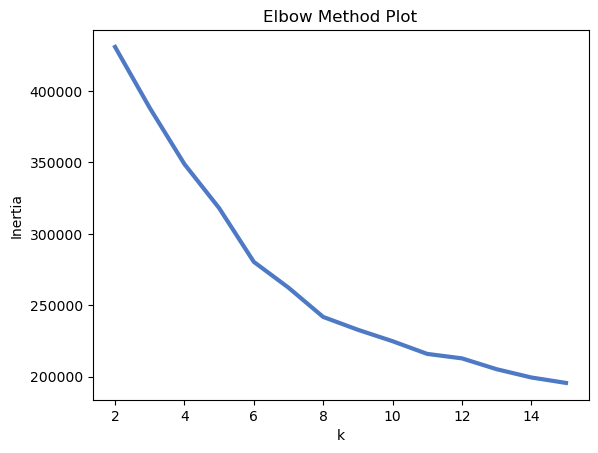

In [11]:
inertia = []

for k in range(2,16):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(2,16), inertia, color = "#4E79C5", linewidth = 3)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method Plot")
plt.savefig("../04_results/k_means/fig4.png", dpi = 300, bbox_inches = "tight")
plt.show()

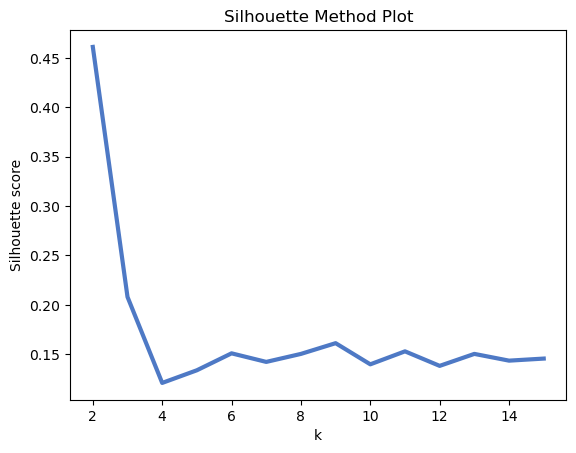

In [12]:
scores = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

plt.plot(range(2,16), scores, color = "#4E79C5", linewidth = 3)
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette Method Plot")
plt.savefig("../04_results/k_means/fig5.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [8]:
def kmeans_sorted_labels(X_scaled, delivery_series, k):
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    temp = pd.DataFrame({
        "Cluster": labels,
        "Delivery_Time": delivery_series.values
    })
    
    # 1) 클러스터별 mean 계산
    order = (
        temp.groupby("Cluster")["Delivery_Time"]
        .mean()
        .sort_values()        # 빠른 → 느린 순
        .index
    )
    
    # 2) 기존 label → 새 label 매핑
    mapping = {old:new for new, old in enumerate(order)}
    
    # 3) 라벨 재정렬
    sorted_labels = pd.Series(labels).map(mapping).values
    
    return sorted_labels

In [9]:
labels_2 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 2)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_2
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,1132,104.532686,100.0,46.025536
1,42311,125.481199,125.0,51.995067


In [10]:
labels_3 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 3)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_3
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,10066,111.443572,105.0,50.722880
1,3504,116.235731,115.0,47.869170
2,29873,130.501958,130.0,51.853285


In [11]:
labels_4 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 4)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_4
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,1132,104.532686,100.0,46.025536
1,24440,107.267676,105.0,41.031497
2,17719,149.633331,155.0,54.443886
3,152,238.552632,245.0,47.033282


In [12]:
labels_5 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 5)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_5
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,1132,104.532686,100.0,46.025536
1,16838,111.986519,110.0,42.752190
2,13469,113.964214,115.0,46.250858
3,11852,156.291090,160.0,55.436094
4,152,238.552632,245.0,47.033282


In [24]:
labels_6 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 6)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_6
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,1132,104.532686,100.0,46.025536
1,12474,109.820426,110.0,43.630012
2,15428,113.810474,115.0,43.108635
3,3415,116.434261,115.0,47.840896
4,10842,161.370965,170.0,54.732353
5,152,238.552632,245.0,47.033282


In [14]:
labels_dict = {
    2: labels_2,
    3: labels_3,
    4: labels_4,
    5: labels_5,
    6: labels_6,
}

flow_rows = []

# k2→k3→k4→k5→k6 순서대로만 연결
for k_a, k_b in zip([2,3,4,5], [3,4,5,6]):

    lab_a = labels_dict[k_a]
    lab_b = labels_dict[k_b]

    for a, b in zip(lab_a, lab_b):
        flow_rows.append((f"k{k_a}_c{a}", f"k{k_b}_c{b}"))

flow_df = pd.DataFrame(flow_rows, columns=["source","target"])
flow_df = flow_df.value_counts().reset_index(name="value")

nodes = sorted(set(flow_df.source) | set(flow_df.target))
idx = {n:i for i,n in enumerate(nodes)}

flow_df.head()

,source,target,value
0,k2_c1,k3_c2,29873
1,k4_c1,k5_c1,16412
2,k3_c2,k4_c1,16150
3,k5_c1,k6_c2,14711
4,k3_c2,k4_c2,13723


In [15]:
RED_NODES = {
    "k4_c2", "k5_c3", "k6_c4",   # 첫번째 혈통 (밝은 빨강)
}

BROWN_NODES = {
    "k4_c3", "k5_c4", "k6_c5"    # 두번째 혈통 (#95211B)
}

node_colors = []

for n in nodes:
    if n in RED_NODES:
        node_colors.append("#DA2222")   # 기존 빨강
    elif n in BROWN_NODES:
        node_colors.append("#95211B")   # 진한 빨강
    else:
        node_colors.append("#4E79C5")   # 나머지 파랑

In [16]:
link_colors = []

for s, t in zip(flow_df.source, flow_df.target):

    # 1️⃣ 밝은 빨강 혈통 (k4_c2 → k5_c3 → k6_c4)
    if s in RED_NODES and t in RED_NODES:
        link_colors.append("rgba(218,34,34,0.6)")   # #DA2222

    # 2️⃣ 진한 빨강 혈통 (k4_c3 → k5_c4 → k6_c5)
    elif s in BROWN_NODES and t in BROWN_NODES:
        link_colors.append("rgba(149,33,27,0.6)")   # #95211B

    # 3️⃣ 나머지
    else:
        link_colors.append("rgba(78,121,197,0.25)")

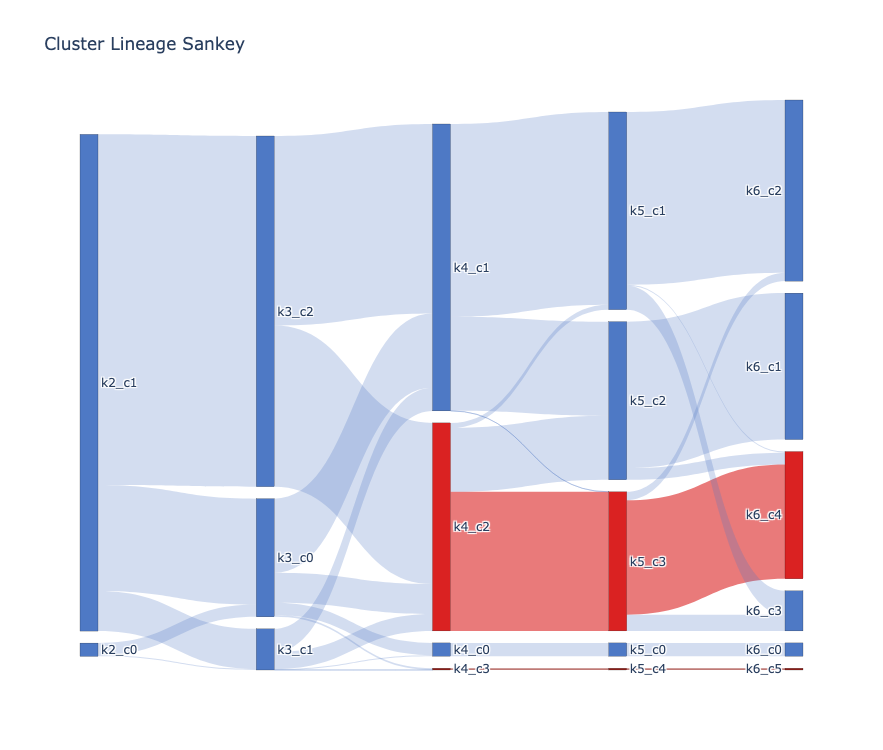

In [17]:
fig = go.Figure(go.Sankey(
    arrangement="snap",   # 🔥 자동 레이아웃 사용
    node=dict(
        label=nodes,
        color=node_colors,
        pad=12,
        thickness=18,
        line=dict(color="black", width=0.2),
    ),
    link=dict(
        source=[idx[s] for s in flow_df.source],
        target=[idx[t] for t in flow_df.target],
        value=flow_df.value,
        color=link_colors
    )
))

fig.update_layout(height=750, title="Cluster Lineage Sankey")
fig.show()

In [13]:
df_analysis = df5.copy()
df_analysis["cluster_k4"] = labels_4

global_mean = df_analysis.drop(columns="cluster_k4").mean()

cluster_means = df_analysis.groupby("cluster_k4").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[0].sort_values(ascending=False)

Area_Other               0.973943
Pickup_Wait_Time         0.118596
Vehicle_scooter          0.054769
Agent_Rating             0.030772
Category_Kitchen         0.010463
Category_Toys            0.008884
Category_Snacks          0.005557
Category_Sports          0.005102
Category_Grocery         0.004610
Category_Skincare        0.003652
Category_Jewelry         0.003031
Category_Pet Supplies    0.001261
Category_Books          -0.000871
Category_Cosmetics      -0.001136
Category_Home           -0.002134
Area_Semi_Urban         -0.003499
Category_Electronics    -0.004258
Vehicle_van             -0.004686
Category_Apparel        -0.008494
Category_Outdoors       -0.010790
Weather_score           -0.011155
Category_Shoes          -0.013996
Traffic_score           -0.250720
Distance                -0.531318
Area_Metropolitian      -0.747715
Agent_Age               -0.797766
Name: 0, dtype: float64

In [14]:
df_analysis = df5.copy()
df_analysis["cluster_k4"] = labels_4

global_mean = df_analysis.drop(columns="cluster_k4").mean()

cluster_means = df_analysis.groupby("cluster_k4").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[1].sort_values(ascending=False)

Agent_Rating             0.086425
Pickup_Wait_Time         0.030880
Weather_score            0.029395
Category_Shoes           0.001378
Category_Apparel         0.001081
Category_Jewelry         0.000868
Category_Electronics     0.000459
Category_Books           0.000418
Category_Home            0.000380
Vehicle_van              0.000153
Category_Outdoors        0.000061
Category_Skincare       -0.000106
Category_Cosmetics      -0.000200
Category_Kitchen        -0.000576
Category_Toys           -0.000584
Category_Pet Supplies   -0.000658
Category_Snacks         -0.000868
Category_Sports         -0.001356
Category_Grocery        -0.001660
Area_Semi_Urban         -0.003499
Vehicle_scooter         -0.006574
Area_Other              -0.026057
Area_Metropolitian      -0.029467
Agent_Age               -0.296306
Traffic_score           -0.823679
Distance                -1.910021
Name: 1, dtype: float64

In [45]:
df_analysis = df5.copy()
df_analysis["cluster_k4"] = labels_4

global_mean = df_analysis.drop(columns="cluster_k4").mean()

cluster_means = df_analysis.groupby("cluster_k4").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[2].sort_values(ascending=False)

Distance                 2.641501
Traffic_score            1.140296
Agent_Age                0.433843
Area_Metropolitian       0.094827
Vehicle_scooter          0.007933
Category_Grocery         0.002073
Category_Sports          0.001456
Category_Pet Supplies    0.001072
Category_Outdoors        0.000863
Category_Snacks          0.000765
Vehicle_van              0.000611
Category_Cosmetics       0.000366
Category_Kitchen         0.000086
Category_Toys            0.000049
Category_Home           -0.000201
Category_Skincare       -0.000333
Category_Books          -0.000363
Category_Electronics    -0.000423
Category_Shoes          -0.000823
Category_Apparel        -0.001147
Category_Jewelry        -0.001632
Area_Semi_Urban         -0.003499
Area_Other              -0.026057
Weather_score           -0.038175
Pickup_Wait_Time        -0.050805
Agent_Rating            -0.119944
Name: 2, dtype: float64

In [15]:
df_analysis = df5.copy()
df_analysis["cluster_k4"] = labels_4

global_mean = df_analysis.drop(columns="cluster_k4").mean()

cluster_means = df_analysis.groupby("cluster_k4").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[3].sort_values(ascending=False)

Distance                 3.142180
Agent_Age                3.010073
Traffic_score            1.379045
Area_Semi_Urban          0.996501
Pickup_Wait_Time         0.073961
Category_Skincare        0.028620
Category_Jewelry         0.027998
Category_Apparel         0.023146
Category_Toys            0.021972
Category_Sports          0.010333
Category_Snacks          0.009021
Category_Electronics     0.007157
Category_Kitchen         0.004698
Category_Cosmetics      -0.001996
Category_Grocery        -0.009012
Category_Books          -0.018423
Category_Shoes          -0.021342
Category_Home           -0.021848
Area_Other              -0.026057
Category_Pet Supplies   -0.028565
Category_Outdoors       -0.030015
Vehicle_van             -0.060921
Agent_Rating            -0.143201
Weather_score           -0.193204
Vehicle_scooter         -0.275596
Area_Metropolitian      -0.747715
Name: 3, dtype: float64

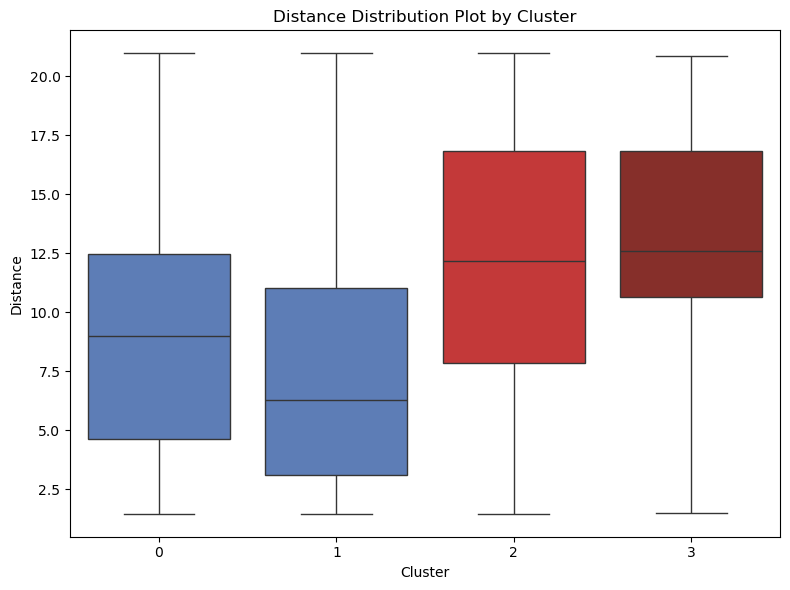

In [28]:
labels_4 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 4)

df_box = df5.copy()
df_box["Cluster"] = labels_4

cluster_palette = {
    0: "#4E79C5",
    1: "#4E79C5",
    2: "#DA2222",
    3: "#95211B"
}

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df_box,
    x="Cluster",
    y="Distance",
    hue="Cluster",
    palette=cluster_palette,
    legend=False
)

plt.title("Distance Distribution Plot by Cluster")
plt.tight_layout()
plt.savefig("../04_results/k_means/fig7.png", dpi=300, bbox_inches="tight")
plt.show()

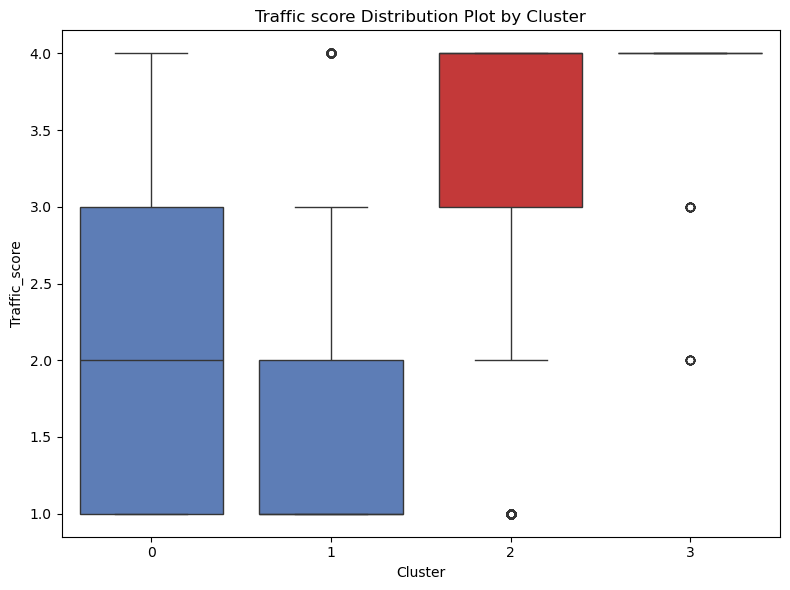

In [22]:
labels_4 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 4)

df_box = df5.copy()
df_box["Cluster"] = labels_4

cluster_palette = {
    0: "#4E79C5",
    1: "#4E79C5",
    2: "#DA2222",
    3: "#95211B"
}

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df_box,
    x="Cluster",
    y="Traffic_score",
    hue="Cluster",
    palette=cluster_palette,
    legend=False
)

plt.title("Traffic score Distribution Plot by Cluster")
plt.tight_layout()
plt.savefig("../04_results/k_means/fig8.png", dpi=300, bbox_inches="tight")
plt.show()

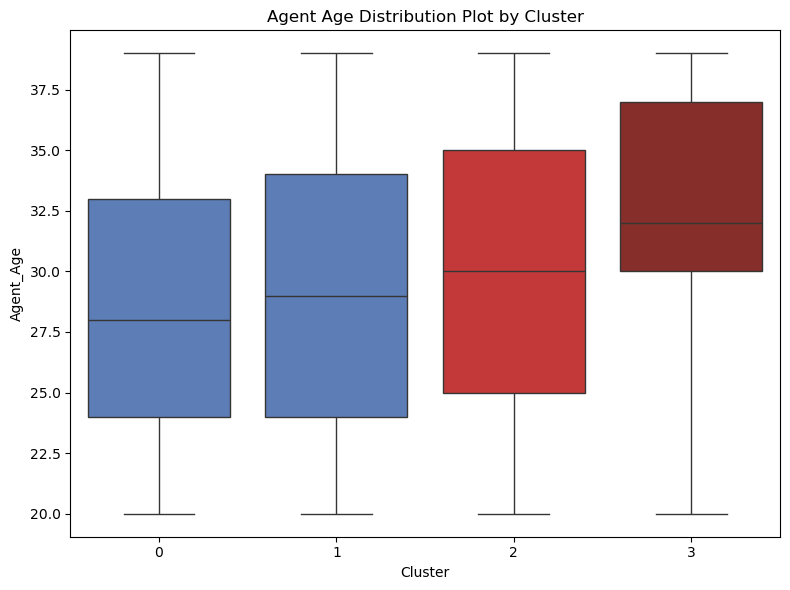

In [25]:
labels_4 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 4)

df_box = df5.copy()
df_box["Cluster"] = labels_4

cluster_palette = {
    0: "#4E79C5",
    1: "#4E79C5",
    2: "#DA2222",
    3: "#95211B"
}

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df_box,
    x="Cluster",
    y="Agent_Age",
    hue="Cluster",
    palette=cluster_palette,
    legend=False
)

plt.title("Agent Age Distribution Plot by Cluster")
plt.tight_layout()
plt.savefig("../04_results/k_means/fig9.png", dpi=300, bbox_inches="tight")
plt.show()

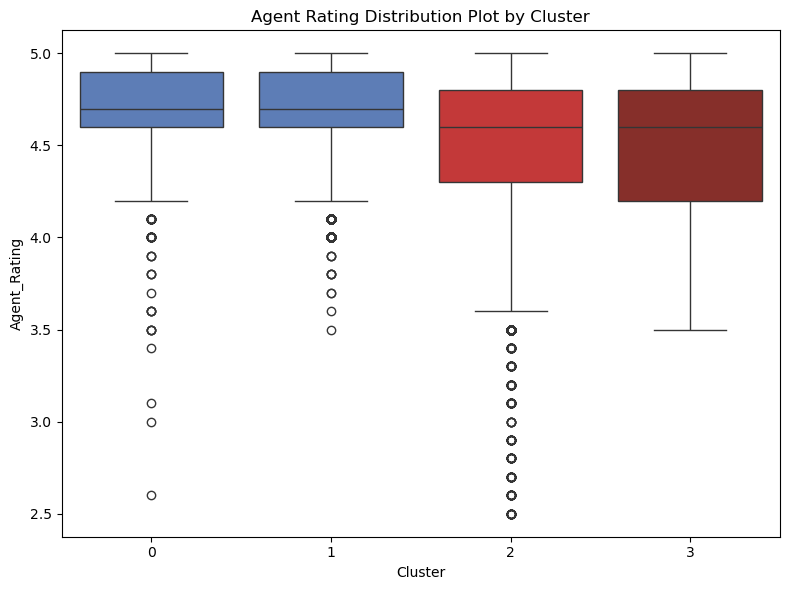

In [26]:
labels_4 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 4)

df_box = df5.copy()
df_box["Cluster"] = labels_4

cluster_palette = {
    0: "#4E79C5",
    1: "#4E79C5",
    2: "#DA2222",
    3: "#95211B"
}

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df_box,
    x="Cluster",
    y="Agent_Rating",
    hue="Cluster",
    palette=cluster_palette,
    legend=False
)

plt.title("Agent Rating Distribution Plot by Cluster")
plt.tight_layout()
plt.savefig("../04_results/k_means/fig10.png", dpi=300, bbox_inches="tight")
plt.show()

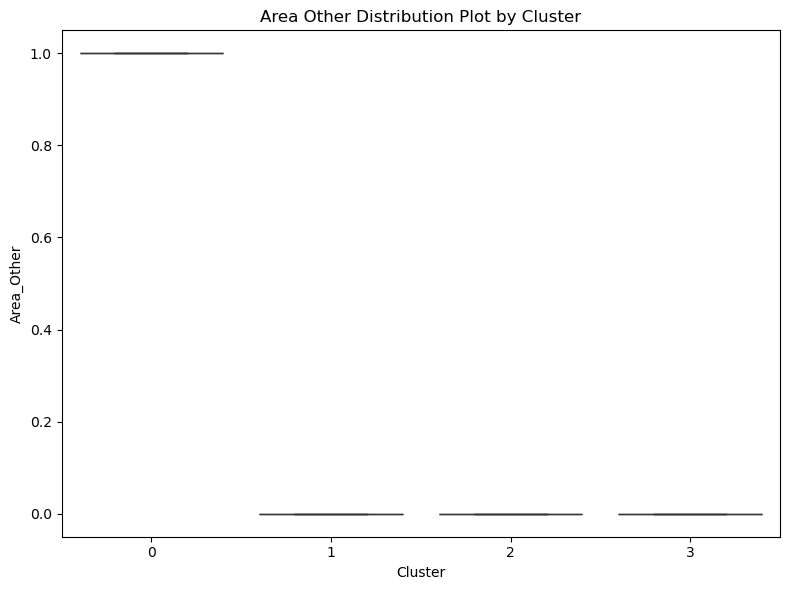

In [27]:
labels_4 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 4)

df_box = df5.copy()
df_box["Cluster"] = labels_4

cluster_palette = {
    0: "#4E79C5",
    1: "#4E79C5",
    2: "#DA2222",
    3: "#95211B"
}

plt.figure(figsize=(8,6))

sns.boxplot(
    data=df_box,
    x="Cluster",
    y="Area_Other",
    hue="Cluster",
    palette=cluster_palette,
    legend=False
)

plt.title("Area Other Distribution Plot by Cluster")
plt.tight_layout()
plt.savefig("../04_results/k_means/fig10.png", dpi=300, bbox_inches="tight")
plt.show()